In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
#中文字体设置
rcParams['font.sans-serif']=['SimHei']
rcParams['axes.unicode_minus']=False

df=pd.read_csv(r'C:\Users\85842\OneDrive\文档\GitHub\shandong_AIS\list\unique_bhw_points_2024010112_merged.csv')
df.head()
df['time']=pd.to_datetime(df['time'])

In [2]:
df.head()

,time,mmsi,status,lon,lat,sog,cog,trueHeading,type,length,ship_category
0,2024-01-01 12:49:03+00:00,223539775,NaN,122.0610,37.8018,44,884,511,30.0,1022.0,渔船
1,2024-01-01 12:55:36+00:00,352002882,0.0,122.1027,37.6882,89,2696,269,70.0,150.0,货船
2,2024-01-01 12:55:55+00:00,352002882,0.0,122.1016,37.6882,89,2693,269,70.0,150.0,货船
3,2024-01-01 12:56:16+00:00,352002882,0.0,122.1006,37.6882,89,2689,270,70.0,150.0,货船
4,2024-01-01 12:56:36+00:00,352002882,0.0,122.0995,37.6882,89,2715,269,70.0,150.0,货船


In [3]:
dfs=df.copy()
dfs.drop_duplicates(subset=['mmsi'],inplace=True)

In [4]:
cols=['mmsi','type','length']
dfs=dfs[cols]

In [5]:
ship_types = {
    '货船': [70,71,72,73,74,75,76,77,78,79],
    '油船': [80,81,82,83,84,85,86,87,88,89],
    '客船': [60,61,62,63,64,65,66,67,68,69],
    '渔船': [30],
    '危险品船': [71,72,73,74,81,82,83,84,91,92,93,94]
}
# 优先级：危险品优先
priority = ['危险品船','货船','油船','客船','渔船']
ship_sets = {k: set(v) for k,v in ship_types.items()}

def classify_ship_type(code):
    if pd.isna(code):
        return '未知'
    c=int(code)
    if c > 100:
        return '未知'    
    if c == 0:
        return '未知'
    for label in priority:
        if c in ship_sets.get(label, set()):
            return label
    return '非运输船'

def classify_length(val):
    if pd.isna(val):
        return '未知'
    try:
        v = float(val)
    except Exception:
        return '未知'
    if 0 <= v <= 100:
        return "100米及以下"
    if 101 <= v <= 200:
        return "101~200米"
    if 201 <= v <= 300:
        return "201~300米"
    if 301 <= v <= 370:
        return "301~370米"
    if v >= 371:
        return "371米以上"
    return '未知'

# 应用到单个 DataFrame
dfs['ship_type'] = dfs['type'].apply(classify_ship_type)
dfs['length_category'] = dfs['length'].apply(classify_length)


C:\Users\85842\AppData\Local\Temp\ipykernel_51632\3463115001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=type_series_plot, order=order, palette='muted')


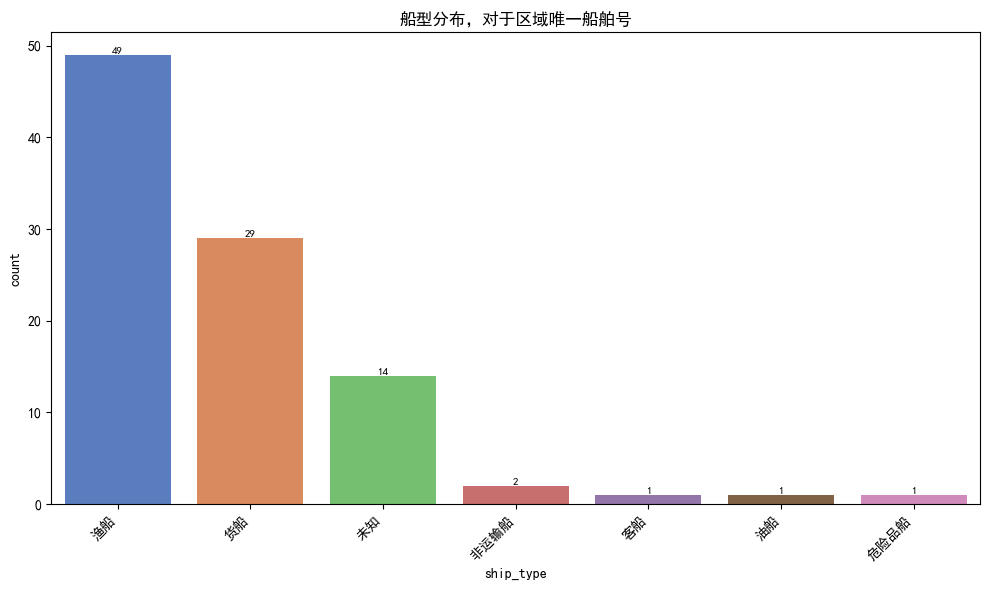

In [ ]:
plt.figure(figsize=(10,6))
# NaN
type_series_plot = dfs['ship_type'].fillna('Nan').astype(str)
order = type_series_plot.value_counts().index
ax = sns.countplot(x=type_series_plot, order=order, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title("船型分布，对于区域唯一船舶号")
# 标签
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f"{height:,}", (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()

C:\Users\85842\AppData\Local\Temp\ipykernel_51632\488974439.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=length_series_plot, order=order, palette='muted')


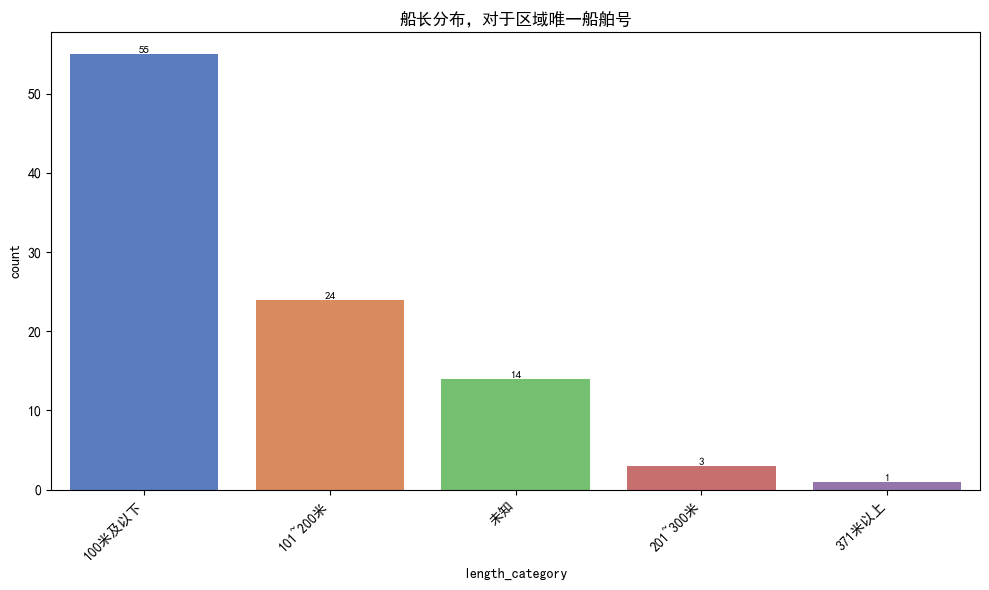

In [7]:
plt.figure(figsize=(10,6))
#长度分类
length_series_plot=dfs['length_category'].fillna('Nan').astype(str)
order=length_series_plot.value_counts().index
ax=sns.countplot(x=length_series_plot, order=order, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title("船长分布，对于区域唯一船舶号")
# 标签
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f"{height:,}", (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=8)
plt.tight_layout()

In [12]:
#分析ais记录
df=pd.read_csv(r'C:\Users\85842\OneDrive\文档\GitHub\shandong_AIS\list\unique_bhw_points_2024010112_merged.csv')
df.drop(columns=['ship_category'],inplace=True)

In [13]:
ship_types = {
    '货船': [70,71,72,73,74,75,76,77,78,79],
    '油船': [80,81,82,83,84,85,86,87,88,89],
    '客船': [60,61,62,63,64,65,66,67,68,69],
    '渔船': [30],
    '危险品船': [71,72,73,74,81,82,83,84,91,92,93,94]
}
# 优先级：危险品优先
priority = ['危险品船','货船','油船','客船','渔船']
ship_sets = {k: set(v) for k,v in ship_types.items()}

def classify_ship_type(code):
    if pd.isna(code):
        return '未知'
    c=int(code)
    if c > 100:
        return '未知'    
    if c == 0:
        return '未知'
    for label in priority:
        if c in ship_sets.get(label, set()):
            return label
    return '非运输船'

def classify_length(val):
    if pd.isna(val):
        return '未知'
    try:
        v = float(val)
    except Exception:
        return '未知'
    if 0 <= v <= 100:
        return "100米及以下"
    if 101 <= v <= 200:
        return "101~200米"
    if 201 <= v <= 300:
        return "201~300米"
    if 301 <= v <= 370:
        return "301~370米"
    if v >= 371:
        return "371米以上"
    return '未知'

# 应用到单个 DataFrame
df['ship_type'] = df['type'].apply(classify_ship_type)
df['length_category'] = df['length'].apply(classify_length)


C:\Users\85842\AppData\Local\Temp\ipykernel_51632\121866405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=type_series_plot, order=order, palette='muted')


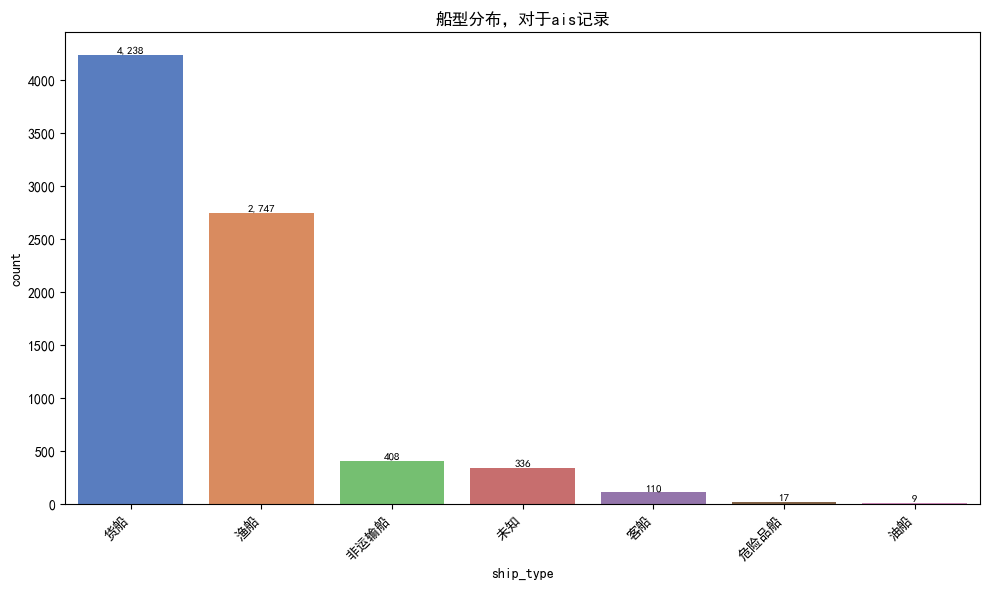

In [14]:
plt.figure(figsize=(10,6))
# NaN
type_series_plot = df['ship_type'].fillna('Nan').astype(str)
order = type_series_plot.value_counts().index
ax = sns.countplot(x=type_series_plot, order=order, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title("船型分布，对于ais记录")
# 标签
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f"{height:,}", (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()

C:\Users\85842\AppData\Local\Temp\ipykernel_51632\839108044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=length_series_plot, order=order, palette='muted')


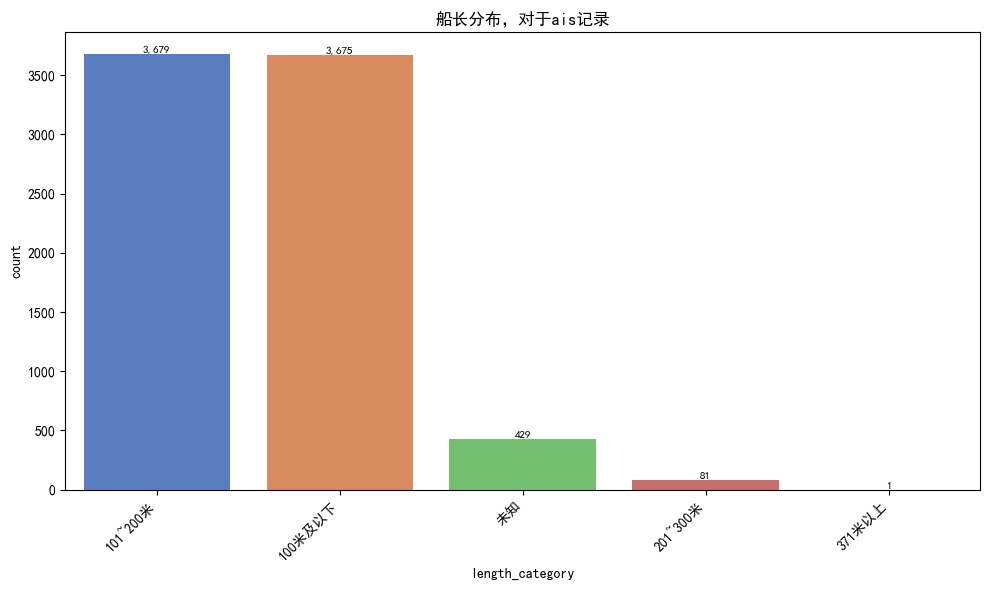

In [16]:
plt.figure(figsize=(10,6))
#长度分类
length_series_plot=df['length_category'].fillna('Nan').astype(str)
order=length_series_plot.value_counts().index
ax=sns.countplot(x=length_series_plot, order=order, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title("船长分布，对于ais记录")
# 标签
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f"{height:,}", (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=8)
plt.tight_layout()